# Chapter 7 - Statistical Hypothesis Testing

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 12})

## Hypothesis Testing Overview
### Concepts Explanation with Example
#### Generate the data

In [4]:
random.seed(2020)                                            # Set the random seed for reproducibility

math2019 = [random.normalvariate(75, 5) for _ in range(900)] # Generate 900 random scores with mean=75 and std=5 (Normal distribution)                
math2020 = [random.normalvariate(73, 5) for _ in range(900)] # Generate 900 random scores with mean=73 and std=5 (Normal distribution)

#### Plot the data

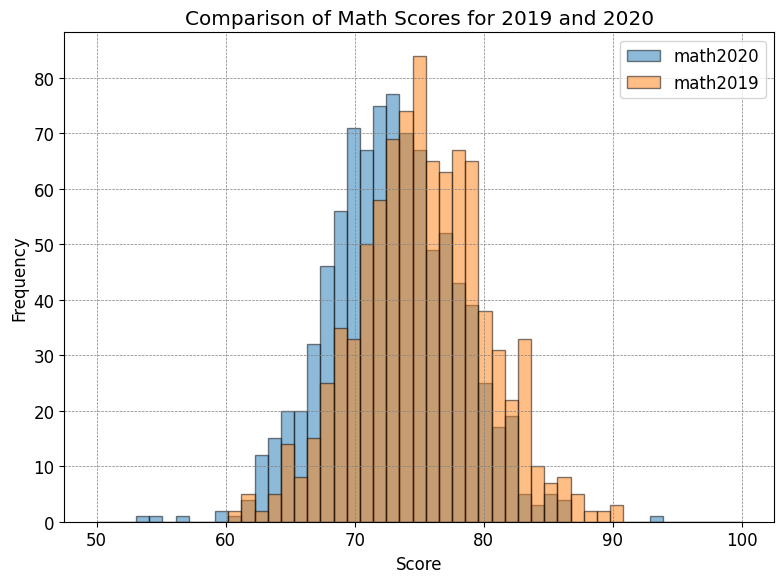

In [6]:
plt.figure(figsize=(8, 6))               # Set the figure size to 10x6 inches

# Plot the histogram for math2020 scores
plt.hist(math2020, 
         bins=np.linspace(50, 100, 50),  # Define bins between 50 and 100 with 50 intervals
         edgecolor="black",              # Add black edges to the bars
         alpha=0.5,                      # Set transparency to 50%
         label="math2020")               # Label for the legend

# Plot the histogram for math2019 scores
plt.hist(math2019, 
         bins=np.linspace(50, 100, 50),  # Define the same bins as math2020 for comparison
         edgecolor="black",              # Add black edges to the bars
         alpha=0.5,                      # Set transparency to 50%
         label="math2019")               # Label for the legend

plt.legend()                                                         # Add a legend
plt.xlabel("Score")                                                  # Label for x-axis
plt.ylabel("Frequency")                                              # Label for y-axis
plt.title("Comparison of Math Scores for 2019 and 2020")             # Add a title for the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a horizontal grid

plt.tight_layout()                       # Adjust layout
plt.show()                               # Display the histogram

#### Calculate the Statistics

In [8]:
from scipy import stats

# Perform the descriptive statistics
desc = stats.describe(math2020)

# Create a dictionary for better readability
summary = {
    "Number of Observations": desc.nobs,
    "Minimum": desc.minmax[0],
    "Maximum": desc.minmax[1],
    "Mean": desc.mean,
    "Variance": desc.variance,
    "Skewness": desc.skewness,
    "Kurtosis": desc.kurtosis
}

# Display the dictionary in a clean way
for key, value in summary.items():
    print(f"{key}: {value:.4f}")

Number of Observations: 900.0000
Minimum: 53.6168
Maximum: 93.2941
Mean: 72.8965
Variance: 24.8145
Skewness: 0.0080
Kurtosis: 0.3445


    A null hypothesis basically says YES: everything is due to randomness. 
    An alternative hypothesis says NO to randomness and claims that there are fundamental differences.

## P-value, example 1

Let's toss a fair coin 6 times and count the total number of heads. There are 7
possibilities, from 0 heads to 6 heads. 

In [12]:
random.seed(2020)                          # Set a random seed for reproducibility
results = []                               # Initialize a list to store the outcomes

# Perform 1,000,000 simulations
for _ in range(1000000):
    
    # Generate 6 random outcomes and count the number of successes (heads)
    results.append(sum([random.random() < 0.5 for i in range(6)])) 

results[:10]                               # Display the first 10 results from the simulation

[2, 3, 3, 3, 3, 3, 1, 1, 1, 3]

In [13]:
from collections import Counter
from math import factorial 

counter = Counter(results)                 # Count occurrences of each number of heads in the results list

# Loop through all possible head counts, sorted for ordered output
for head in sorted(counter.keys()):
    
    comput = counter[head] / 1000000                                          # Compute the probability from the simulation results
    theory = 0.5**6 * factorial(6) / (factorial(head) * factorial(6 - head))  # Calculate theoretical probability
    
    # Print results in a formatted string showing heads, computational, and theoretical values
    print("heads: {}; Computational: {}; Theoretical: {}".format(head, comput, theory))

heads: 0; Computational: 0.015913; Theoretical: 0.015625
heads: 1; Computational: 0.093367; Theoretical: 0.09375
heads: 2; Computational: 0.234098; Theoretical: 0.234375
heads: 3; Computational: 0.312343; Theoretical: 0.3125
heads: 4; Computational: 0.234654; Theoretical: 0.234375
heads: 5; Computational: 0.093995; Theoretical: 0.09375
heads: 6; Computational: 0.01563; Theoretical: 0.015625


#### Explanation of Output:
- **heads**: Number of heads obtained in 6 coin flips (from 0 to 6).  
- **Computational**: Simulated probability (relative frequency) of obtaining that many heads.  
- **Theoretical**: Exact theoretical probability using the Binomial Distribution formula:  

$$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$$

Where:  
- $n = 6$ (number of trials)  
- $p = 0.5$ (probability of success)  
- $k$ is the number of heads.  

The term $ \binom{n}{k} $ represents the number of ways to choose $k$ successes from $n$ trials, and is calculated as:

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

## P-value, example 2

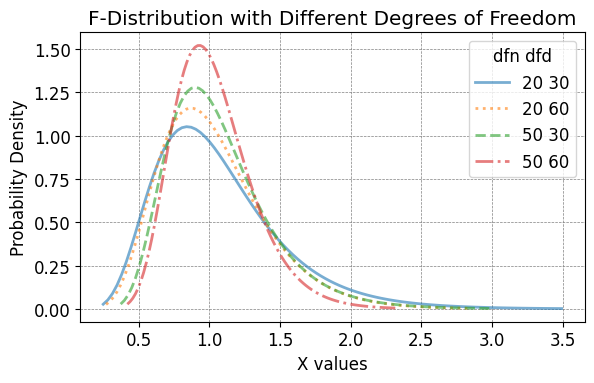

In [16]:
from scipy.stats import f

plt.figure(figsize=(6, 4))      # Set the figure size

styles = ["-", ":", "--", "-."]  # Define line styles for different curves

# Loop through pairs of degrees of freedom (numerator and denominator)
for i, [dfn, dfd] in enumerate([[20, 30], [20, 60], [50, 30], [50, 60]]):
    
    x = np.linspace(  # Generate x-values for plotting the F-distribution PDF
        f.ppf(0.001, dfn, dfd),         # Lower bound: 0.1% point of the F-distribution
        f.ppf(0.999, dfn, dfd),         # Upper bound: 99.9% point of the F-distribution
        100                             # Generate 100 points between bounds
    )
    plt.plot(  # Plot the F-distribution PDF for the current degrees of freedom
        x, 
        f.pdf(x, dfn, dfd),             # F-distribution PDF with dfn and dfd
        linestyle=styles[i],            # Apply different line styles for each curve
        lw=2,                           # Line width set to 2
        alpha=0.6,                      # Set transparency to 60%
        label='{} {}'.format(dfn, dfd)  # Add legend label with degrees of freedom
    )

plt.legend(title="dfn dfd")                                          # Add legend with a title
plt.xlabel("X values")                                               # Label for the x-axis
plt.ylabel("Probability Density")                                    # Label for the y-axis
plt.title("F-Distribution with Different Degrees of Freedom")        # Add a plot title
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid

plt.tight_layout()                      # Adjust layout
plt.show()                              # Display the plot

The code bellow generates and visualizes an F-distribution with specific degrees of freedom (dfn = 20 and dfd = 60) and highlights regions of interest under the curve.

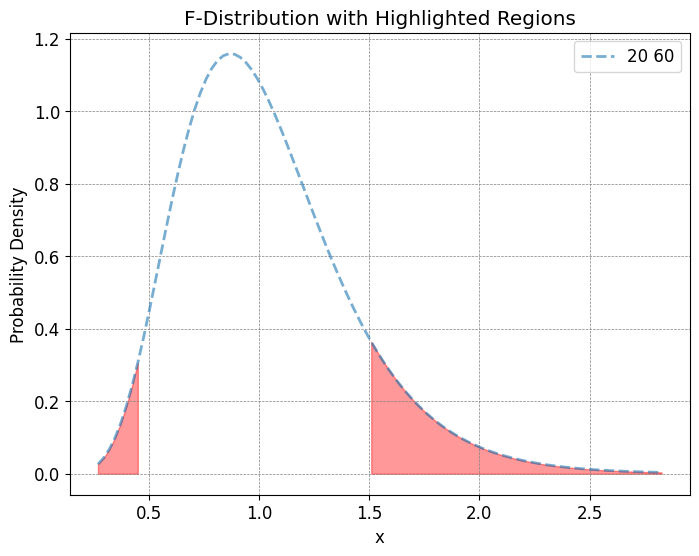

In [18]:
plt.figure(figsize=(8, 6))    # Set the figure size

[dfn, dfd] = [20, 60]         # Define degrees of freedom for numerator (dfn) and denominator (dfd)

# Generate x values for the F-distribution curve
x = np.linspace(f.ppf(0.001, dfn, dfd),   # Lower bound based on the 0.1% quantile
                f.ppf(0.999, dfn, dfd),   # Upper bound based on the 99.9% quantile
                100)                      # Number of points to generate

# Plot the F-distribution PDF (Probability Density Function)
plt.plot(x, 
         f.pdf(x, dfn, dfd),              # Calculate the PDF for each x
         linestyle="--",                  # Use a dashed line style
         lw=2,                            # Set line width to 2
         alpha=0.6,                       # Set transparency for the line
         label='{} {}'.format(dfn, dfd))  # Add a legend with dfn and dfd values

# Define the region to the right of x = 1.5 for highlighting
right = x[x > 1.5]  # Select x values greater than 1.5

# Define the region to the left where the PDF is lower than the first right PDF value
left = x[f.pdf(x, dfn, dfd) < f.pdf(right, dfn, dfd)[0]][0:8]  # Identify left x-values where PDF is smaller

# Highlight the area under the curve to the right of 1.5
plt.fill_between(right, 
                 f.pdf(right, dfn, dfd),  # Fill the PDF values under the curve
                 alpha=0.4,               # Set transparency for the filled area
                 color="r")               # Use red color for highlighting

# Highlight the selected left-side region under the curve
plt.fill_between(left, 
                 f.pdf(left, dfn, dfd),   # Fill the PDF values under the curve
                 alpha=0.4,               # Set transparency for the filled area
                 color="r")               # Use red color for highlighting

plt.legend()                                                         # Display the legend
plt.xlabel("x")                                                      # Add x-axis label
plt.ylabel("Probability Density")                                    # Add y-axis label
plt.title("F-Distribution with Highlighted Regions")                 # Add a title
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid

plt.show()                                                           # Display the final plot

### P-value

The integration of the shaded area gives us the P-value for observing the value 1.5. Thefollowing code snippet uses the **Cumulative Distribution Function (CDF)** to calculatethe value:

In [20]:
# Cumulative Distribution Function (CDF) to calculate the value:
f.cdf(left[-1],dfn,dfd) + (1-f.cdf(right[0],dfn,dfd))

0.13707369569097622

The P-value is about 0.138, so not very bad. It is somewhat typical to observe a 1.5
from such an F-distribution. 

If your pre-selected significance level is α = 0.05, `0.1371, >> 0.05`, then this
observation is not significant enough (there is not enough evidence to reject the null hypothesis). 

The observed value x = 1.5 is not extreme enough to provide evidence against the null hypothesis.

# t-Distributions

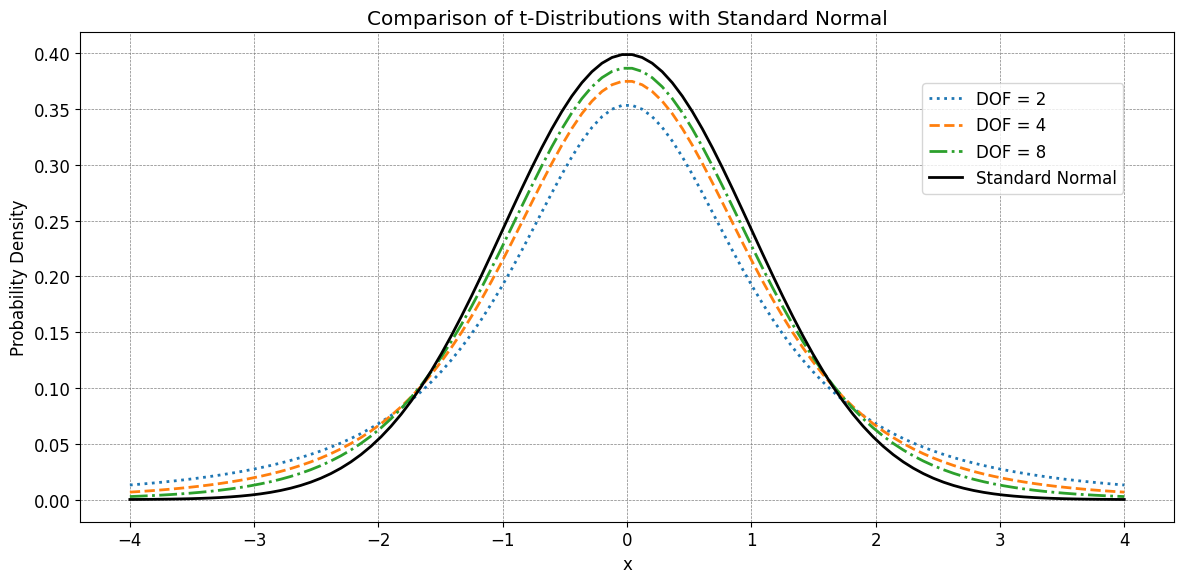

In [23]:
from scipy.stats import t, norm
plt.figure(figsize=(12, 6))

DOFs = [2, 4, 8]                      # List of Degrees of Freedom
linestyles = [":", "--", "-."]        # Different line styles for each DOF

# Loop through each degree of freedom (DOF) and plot its t-distribution PDF with different colors
for i, df in enumerate(DOFs):         # Iterate through each DOF in the list
    x = np.linspace(-4, 4, 100)       # Generate 100 equally spaced x-values between -4 and 4
    rv = t(df)                        # Create a t-distribution object with the current DOF
    plt.plot(x, rv.pdf(x),            # Plot the Probability Density Function (PDF) for the t-distribution
             lw=2,                    # Set line width to 2
             linestyle=linestyles[i], # Apply a specific line style based on index i
             label=f"DOF = {df}")     # Add a legend entry showing the current DOF

# Plot the standard normal distribution for comparison
plt.plot(x, norm(0, 1).pdf(x),        # Plot the PDF for the standard normal distribution (mean=0, std=1)
         lw=2,                        # Set line width to 2
         linestyle="-",               # Use a solid line style
         color="black",               # Set the line color to black
         label="Standard Normal")     # Add a legend entry for the standard normal distribution


plt.legend(loc=[0.77, 0.67])          # Add legend at specified location
plt.xlabel("x")                       # Label for x-axis
plt.ylabel("Probability Density")     # Label for y-axis
plt.title("Comparison of t-Distributions with Standard Normal")      # Title of the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid for clarity

plt.tight_layout()                    # Adjust layout
plt.show()                            # Display the plot

### We can see that DOF > 30, t-distribution tends to normal

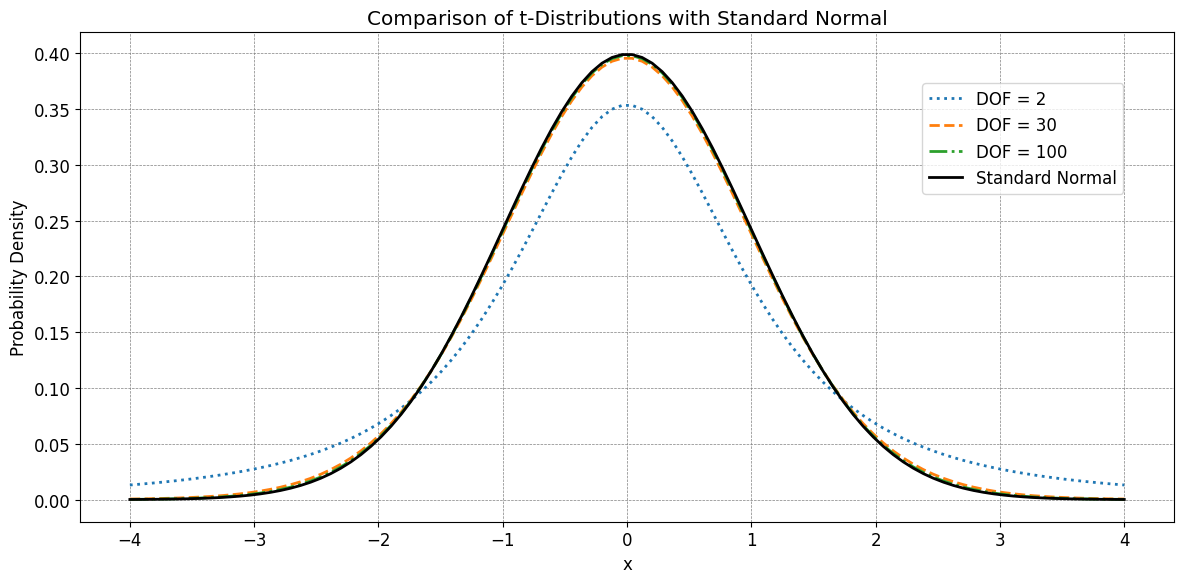

In [25]:
from scipy.stats import t, norm
plt.figure(figsize=(12, 6))

DOFs = [2, 30, 100]                   # List of Degrees of Freedom
linestyles = [":", "--", "-."]        # Different line styles for each DOF

# Loop through each degree of freedom (DOF) and plot its t-distribution PDF with different colors
for i, df in enumerate(DOFs):         # Iterate through each DOF in the list
    x = np.linspace(-4, 4, 100)       # Generate 100 equally spaced x-values between -4 and 4
    rv = t(df)                        # Create a t-distribution object with the current DOF
    plt.plot(x, rv.pdf(x),            # Plot the Probability Density Function (PDF) for the t-distribution
             lw=2,                    # Set line width to 2
             linestyle=linestyles[i], # Apply a specific line style based on index i
             label=f"DOF = {df}")     # Add a legend entry showing the current DOF

# Plot the standard normal distribution for comparison
plt.plot(x, norm(0, 1).pdf(x),        # Plot the PDF for the standard normal distribution (mean=0, std=1)
         lw=2,                        # Set line width to 2
         linestyle="-",               # Use a solid line style
         color="black",               # Set the line color to black
         label="Standard Normal")     # Add a legend entry for the standard normal distribution


plt.legend(loc=[0.77, 0.67])          # Add legend at specified location
plt.xlabel("x")                       # Label for x-axis
plt.ylabel("Probability Density")     # Label for y-axis
plt.title("Comparison of t-Distributions with Standard Normal")      # Title of the plot
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid for clarity

plt.tight_layout()                    # Adjust layout
plt.show()                            # Display the plot

The **t-statistic** $t$ is calculated as follows:

$$
t = \frac{\mu_{2020} - 75}{s / \sqrt{n}}
$$

Where:  
- $\mu_{2020}$ : Sample mean for the year 2020.  
- $75$ : The hypothesized population mean.  
- $s$ : Sample standard deviation.  
- $n$ : Sample size.  

In [27]:
t = (np.mean(math2020)-75)/(np.std(math2020)/30)

print(f't-Statistic: {t:.4f}')

t-Statistic: -12.6754


## t-Statistic and their corresponding locations

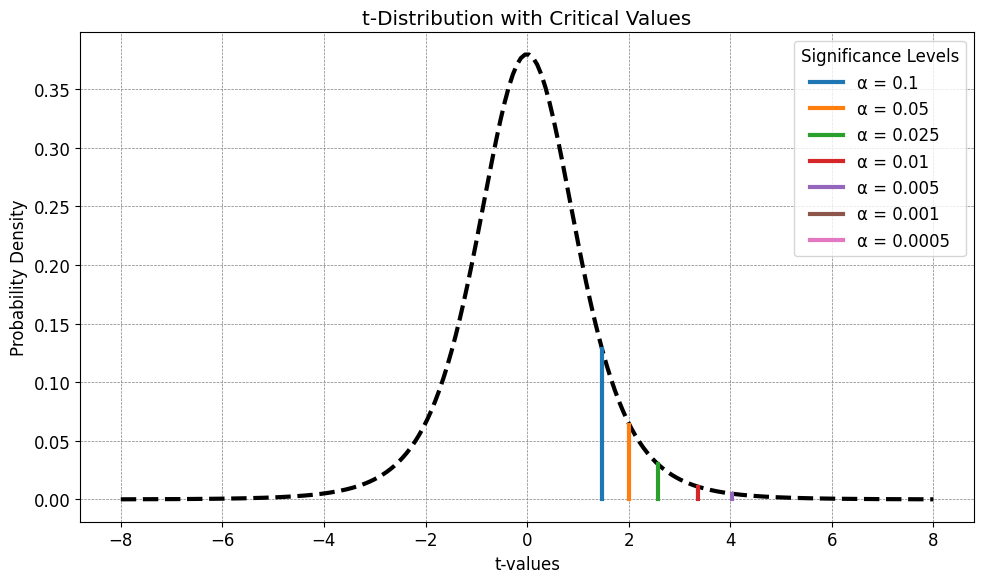

In [29]:
from scipy.stats import t   

plt.figure(figsize=(10, 6))           # Set the figure size

df = 5                                # Degrees of freedom for the t-distribution
x = np.linspace(-8, 8, 200)           # Generate 200 equally spaced x-values between -8 and 8
rv = t(df)                            # Create the t-distribution object with df = 5

# Plot the t-distribution PDF with a dashed line
plt.plot(x, rv.pdf(x),                # Plot the Probability Density Function (PDF)
         color='black',               # Use black color for the line
         lw=3,                        # Set line width to 3
         linestyle="--")              # Use dashed line style

# Define significance levels (alpha) and their corresponding critical t-values
alphas = [0.1, 0.05, 0.025, 0.01, 0.005, 0.001, 0.0005]          # List of significance levels
thresholds = [1.476, 2.015, 2.571, 3.365, 4.032, 5.894, 6.869]  # Corresponding critical t-values

# Plot vertical lines at the critical t-values for each significance level
for threshold, alpha in zip(thresholds, alphas):  # Loop through critical t-values and alphas
    plt.plot([threshold, threshold],              # Draw vertical lines at critical t-values
             [0, rv.pdf(threshold)],              # From y=0 to the PDF value at the threshold
             label=f"α = {alpha}",                # Label the line with the significance level
             linewidth=3)                         # Set the line width to 3

plt.legend(title="Significance Levels")           # Add a legend with a title
plt.title("t-Distribution with Critical Values")  # Add a title to the plot
plt.xlabel("t-values")                            # Label for the x-axis
plt.ylabel("Probability Density")                 # Label for the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a grid
plt.tight_layout()                                # Adjust layout to prevent overlap
plt.show()                                        # Display the plot


*The significance levels for a t-statistics distribution with DOF = 5*

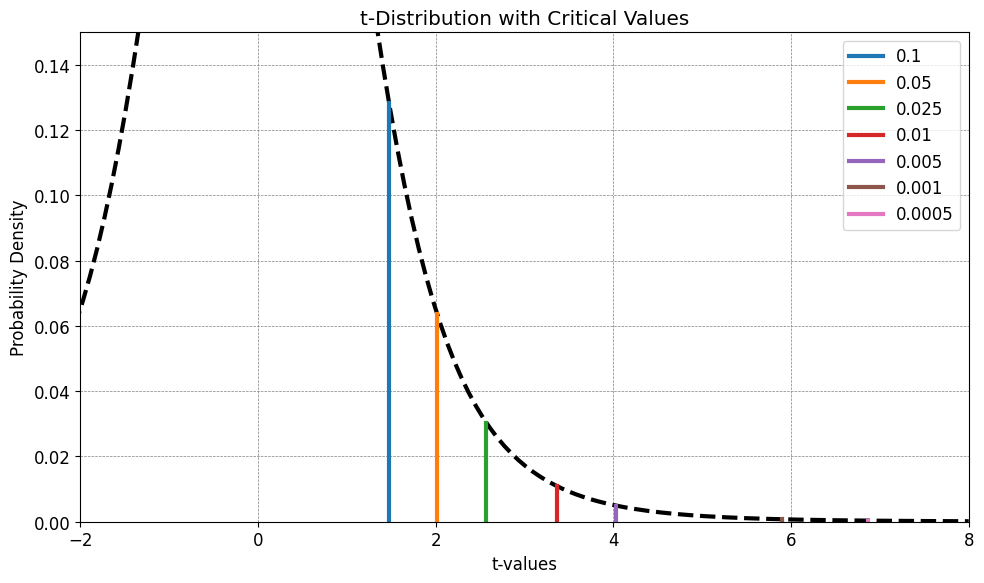

In [31]:
plt.figure(figsize=(10, 6))           # Set the figure size

df = 5                                # Degrees of freedom for the t-distribution
x = np.linspace(-8, 8, 200)           # Generate 200 equally spaced x-values between -8 and 8
rv = t(df)                            # Define the t-distribution with df = 5

# Plot the t-distribution PDF with a dashed line
plt.plot(x, rv.pdf(x),                # Plot the Probability Density Function (PDF) for the t-distribution
         color='black',               # Use black color
         lw=3,                        # Set line width to 3
         linestyle="--")              # Use dashed line style

# Define significance levels (alpha) and their corresponding critical t-values
alphas = [0.1, 0.05, 0.025, 0.01, 0.005, 0.001, 0.0005]          # List of significance levels
threasholds = [1.476, 2.015, 2.571, 3.365, 4.032, 5.894, 6.869]  # Corresponding t-critical values

# Plot vertical lines at the critical t-values for each significance level
for thre, alpha in zip(threasholds, alphas):   # Loop through critical t-values and alphas
    plt.plot([thre, thre],                     # Draw a vertical line at the threshold
             [0, rv.pdf(thre)],                # Start from y=0 to the PDF value at the threshold
             label=f"{alpha}",                 # Label the line with the significance level
             linewidth=3)                      # Set the line width to 3

plt.legend()                                   # Add a legend showing the significance levels
plt.title("t-Distribution with Critical Values")  # Add a title for the plot
plt.xlabel("t-values")                         # Label for the x-axis
plt.ylabel("Probability Density")              # Label for the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a grid
plt.xlim(-2,8)                                 # X limits
plt.ylim(0,0.15)                               # Y limits

plt.tight_layout()                             # Adjust layout to prevent overlap
plt.show()                                     # Display the plot

*A zoomed-in t-distribution showing different significance levels*

## Compare two-tail and one-tail significance level

Notice that for α = 0.2, the t-statistic is the same as α = 0.1 for a one-tailed test. The
following code snippet illustrates the relationship between t-statistic and one-tailed test,
using α = 0.01 as an example. I picked the most important region to show:

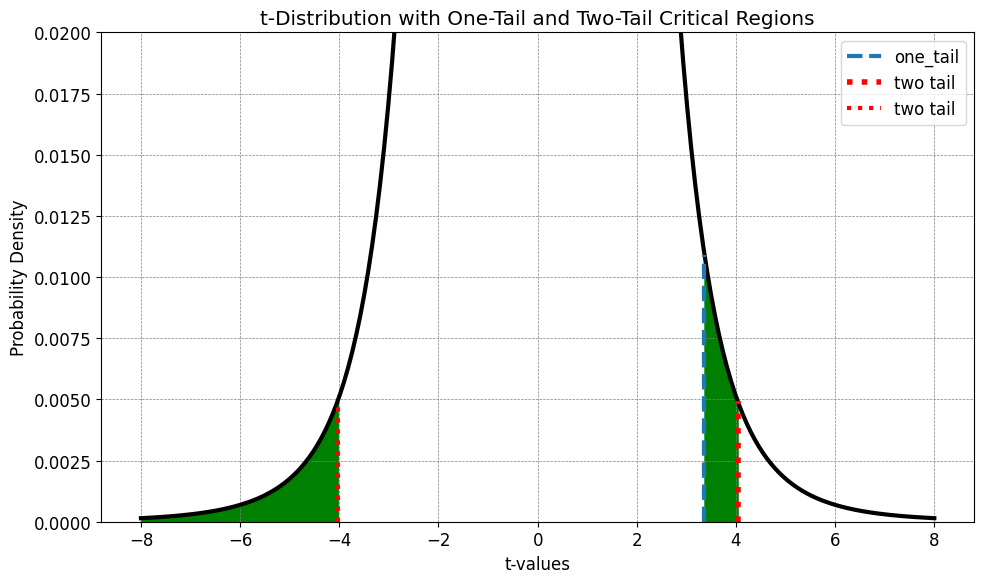

In [35]:
plt.figure(figsize=(10, 6))          # Set the figure size to 10x6 inches

df = 5                               # Degrees of freedom for the t-distribution
x = np.linspace(-8, 8, 200)          # Generate 200 equally spaced x-values between -8 and 8
rv = t(df)                           # Define the t-distribution with df = 5

# Plot the t-distribution PDF as a dashed line
plt.plot(x, rv.pdf(x),               # Plot the Probability Density Function (PDF) for the t-distribution
         'k-',                       # Black solid line
         lw=3)                       # Set line width to 3

# Define significance level and critical values for one-tail and two-tail tests
alpha = 0.01                         # Significance level α = 0.01
one_tail = 3.365                     # Critical value for one-tail test
two_tail = 4.032                     # Critical value for two-tail test

# Plot the vertical line for one-tail test at the critical value
plt.plot([one_tail, one_tail],       # Draw a vertical line at one_tail
         [0, rv.pdf(one_tail)],      # From y=0 to PDF value at one_tail
         label="one_tail",           # Label for the legend
         linewidth=3,                # Line width of 3
         linestyle="--")             # Use dashed line style

# Plot the vertical lines for two-tail test at the critical values
plt.plot([two_tail, two_tail],       # Draw a vertical line at two_tail
         [0, rv.pdf(two_tail)],      # From y=0 to PDF value at two_tail
         label="two tail",           # Label for the legend
         linewidth=4,                # Line width of 4
         color="r",                  # Use red color for visibility
         linestyle=":")              # Use dotted line style

plt.plot([-two_tail, -two_tail],     # Draw a vertical line at negative two_tail
         [0, rv.pdf(two_tail)],      # From y=0 to PDF value at two_tail
         label="two tail",           # Label for the legend
         linewidth=3,                # Line width of 3
         color="r",                  # Use red color for visibility
         linestyle=":")              # Use dotted line style

# Shade the rejection regions for two-tailed test (left and right tails)
plt.fill_between(np.linspace(-8, -two_tail, 200),              # Shade area from -8 to -two_tail
                 rv.pdf(np.linspace(-8, -two_tail, 200)),      # Generate 200 x-values from -8 to -two_tail
                 color="g")                                    # Use green color for shading

plt.fill_between(np.linspace(one_tail, two_tail, 200),         # Shade area from one_tail to two_tail
                 rv.pdf(np.linspace(one_tail, two_tail, 200)), # Generate 200 x-values from -8 to -two_tail
                 color="g")                                    # Use green color for shading

plt.ylim(0, 0.02)                  # Set y-axis limits to focus on the relevant PDF region
plt.legend()                       # Add a legend to identify lines and shading
plt.title("t-Distribution with One-Tail and Two-Tail Critical Regions")  # Add a title
plt.xlabel("t-values")             # Label for the x-axis
plt.ylabel("Probability Density")  # Label for the y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add grid lines
plt.tight_layout()                 # Adjust layout to avoid overlaps
plt.show()                         # Display the plot


*A comparison of two-tailed and one-tailed results for the same significance level.*

## Example 1, t-test

In [38]:
from scipy import stats

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(math2020, 75.0)

# Print the results in a readable format
print(f"=== One-Sample t-Test Results ===\n")
print(f"T-Statistic: {t_stat:.4f}")        # Display t-statistic rounded to 4 decimal places
print(f"    P-Value:   {p_value:.4f}")     # Display p-value rounded to 4 decimal places

=== One-Sample t-Test Results ===

T-Statistic: -12.6683
    P-Value:   0.0000


# Two-sample t-test

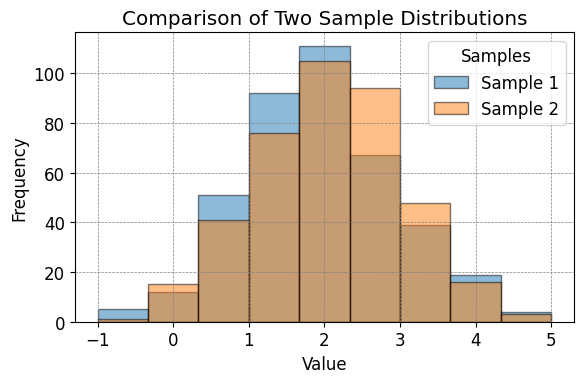

In [40]:
np.random.seed(2020)  # Set the random seed

# Generate two samples: normally distributed data
sample1 = np.random.normal(2, 1, 400)   # Sample 1: mean = 2, standard deviation = 1, size = 400
sample2 = np.random.normal(2.1, 1, 400) # Sample 2: mean = 2.1, standard deviation = 1, size = 400

# Create the figure and set the size
plt.figure(figsize=(6, 4))              # Set the figure size to 10x6 inches

# Plot the histogram for Sample 1
plt.hist(sample1, 
         bins=np.linspace(-1, 5, 10),   # Define bin edges from -1 to 5 with 10 intervals
         edgecolor='black',             # Add black edges to histogram bars
         alpha=0.5,                     # Set transparency to 50%
         label="Sample 1")              # Add label for legend

# Plot the histogram for Sample 2
plt.hist(sample2, 
         bins=np.linspace(-1, 5, 10),   # Use the same bin edges for comparison
         edgecolor='black',             # Add black edges to histogram bars
         alpha=0.5,                     # Set transparency to 50%
         label="Sample 2")              # Add label for legend

# Add legend, labels, and title
plt.legend(title="Samples")             # Display the legend with a title
plt.xlabel("Value")                     # Label for x-axis
plt.ylabel("Frequency")                 # Label for y-axis
plt.title("Comparison of Two Sample Distributions")  # Title for the plot

# Add grid
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")

# Adjust layout and display the plot
plt.tight_layout()                     
plt.show()                            

In [41]:
 stats.ttest_ind(sample1,sample2)

TtestResult(statistic=-1.7765855804956159, pvalue=0.07601736167057595, df=798.0)

In [42]:
# Perform a two-sample t-test
t_stat, p_value=  stats.ttest_ind(sample1,sample2)

# Print the results
print(f"T-Statistic: {t_stat:.4f}")        
print(f"    P-Value:  {p_value:.4f}")

T-Statistic: -1.7766
    P-Value:  0.0760


Our t-statistic is about -1.8. If our significance level is set to 0.05, we will fail to reject our null hypothesis.

How about increasing the number of samples? Will it help? Intuitively, we know that more
data contains more information about the population; therefore, it is expected that we'll
see a smaller P-value. The following code snippet does the job:

In [45]:
np.random.seed(2020)                     # Set seed

sample1 = np.random.normal(2, 1, 900)    # Generate sample 1 with mean=2, std=1, size=900
sample2 = np.random.normal(2.1, 1, 900)  # Generate sample 2 with mean=2.1, std=1, size=900

stats.ttest_ind(sample1,sample2)

TtestResult(statistic=-3.2117556839559143, pvalue=0.0013425868478419776, df=1798.0)

Note that P-values can vary significantly from sample to sample. In the following code
snippet, I sampled the two distributions and conducted the two-sample t-test 100 times:

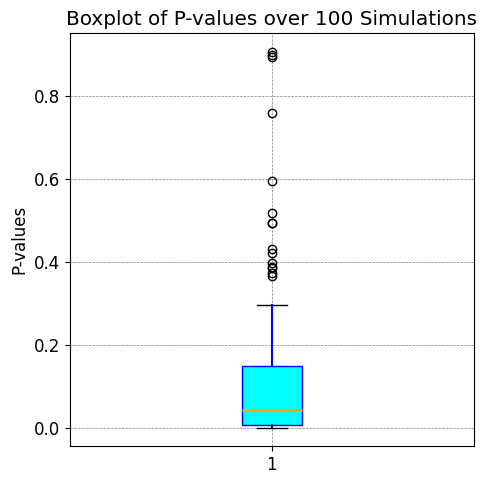

In [47]:
np.random.seed(2020)                                        # Set seed for reproducibility
p_values = []                                               # Initialize list to store p-values

for _ in range(100):                                        # Run 100 iterations
    sample1 = np.random.normal(2, 1, 900)                   # Generate sample 1 with mean=2, std=1, size=900
    sample2 = np.random.normal(2.1, 1, 900)                 # Generate sample 2 with mean=2.1, std=1, size=900
    p_values.append(stats.ttest_ind(sample1,sample2)[1])    # Make the t-test and append to p_values list

plt.figure(figsize=(5, 5))                                  # Set figure size

plt.boxplot(p_values, 
            vert=True,                                      # Ensure boxplot is vertical
            patch_artist=True,                              # Enable box fill colors
            boxprops=dict(facecolor="cyan", color="blue"),  # Box fill and edge colors
            medianprops=dict(color="orange", linewidth=2),  # Style for the median line
            whiskerprops=dict(color="blue", linewidth=1.5)) # Style for whiskers

plt.title("Boxplot of P-values over 100 Simulations")       # Add plot title
plt.ylabel("P-values")                                      # Add y-axis label
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add horizontal grid

plt.tight_layout()                                          # Adjust layout for better appearance
plt.show()                                                  # Display the boxplot

*A boxplot of P-values for 100 standard two-sample t-tests.*

## Two-sample t-test, different variance

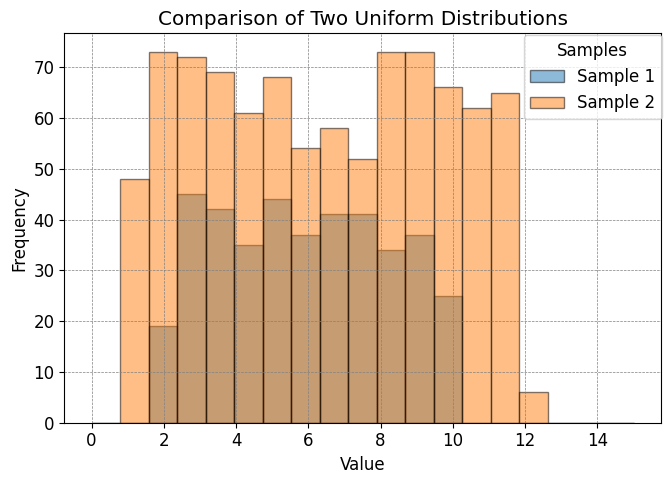

In [50]:
np.random.seed(2020)                     # Set the random seed

# Generate two random uniform distributions:
sample1 = np.random.uniform(2, 10, 400)  # Sample 1: 400 values between 2 and 10
sample2 = np.random.uniform(1, 12, 900)  # Sample 2: 900 values between 1 and 12


plt.figure(figsize=(7, 5))  # Set the figure size

# Plot histogram for sample1
plt.hist(sample1, 
         bins=np.linspace(0, 15, 20),    # Define 20 bins from 0 to 15
         edgecolor='black',              # Add black edges to the bars
         alpha=0.5,                      # Set transparency to 50% for overlay effect
         label="Sample 1")               # Add label for legend

# Plot histogram for sample2
plt.hist(sample2, 
         bins=np.linspace(0, 15, 20),    # Use the same bins as sample1 for comparison
         edgecolor='black',              # Add black edges to the bars
         alpha=0.5,                      # Set transparency to 50% for overlay effect
         label="Sample 2")               # Add label for legend

# Add legend, labels, and title for clarity
plt.legend(loc=[0.77, 0.78],title="Samples")                # Add legend with a title
plt.xlabel("Value")                                         # Label for the x-axis
plt.ylabel("Frequency")                                     # Label for the y-axis
plt.title("Comparison of Two Uniform Distributions")        # Add a descriptive title
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add a grid

# Adjust layout and display the plot
plt.tight_layout()  
plt.show()         

*Two uniformly distributed samples with different means, variances, and sample sizes.*

In [52]:
# We'll tell it that the variances are not equal
stats.ttest_ind(sample1,sample2,equal_var=False)

TtestResult(statistic=-3.1364786834852163, pvalue=0.0017579405400172416, df=1039.5589421815475)

With a significance level of 0.01, we will have enough confidence to reject the null
hypothesis. 

The DF with decimal values: When the variances of the two samples are not assumed to be equal (equal_var=False), Welch's t-test adjusts the degrees of freedom to account for the unequal variances. This adjusted degrees of freedom is not necessarily an integer and is computed using the Welch–Satterthwaite equation.

## Example 2, normality test

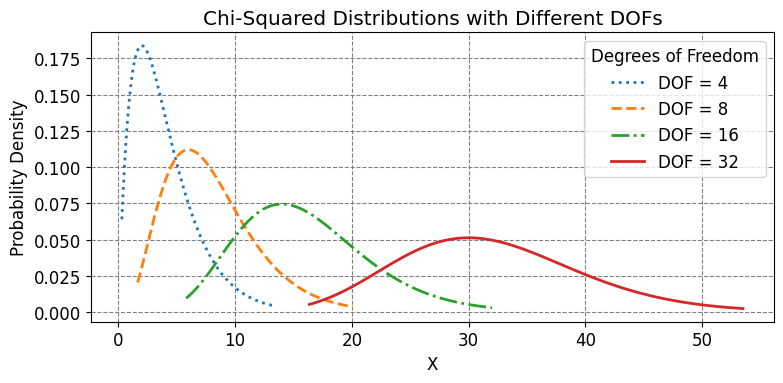

In [56]:
from scipy.stats import chi2


plt.figure(figsize=(8, 4))              # Set the figure size

# Define degrees of freedom (DOFs) for the Chi-squared distributions
DOFs = [4, 8, 16, 32]                    # Different DOFs to compare Chi-squared PDFs
linestyles = [":", "--", "-.", "-"]      # Line styles for distinguishing each curve

# Loop through each DOF to plot its corresponding Chi-squared PDF
for i, df in enumerate(DOFs):
    x = np.linspace(                     # Generate x-values based on the percent points
        chi2.ppf(0.01, df),              # Lower bound: 1st percentile of Chi-squared distribution
        chi2.ppf(0.99, df),              # Upper bound: 99th percentile of Chi-squared distribution
        100                              # Number of points for smooth curve
    )
    rv = chi2(df)                        # Create a Chi-squared random variable with given DOF
    plt.plot(x,                          # X-axis values
             rv.pdf(x),                  # Corresponding PDF values (Y-axis)
             lw=2,                       # Line width for better visibility
             label=f"DOF = {df}",        # Add legend for each curve indicating DOF
             linestyle=linestyles[i])    # Use different line styles for distinction

# Add legend, grid, and labels for clarity
plt.legend(title="Degrees of Freedom")                     # Display legend with title
plt.xlabel("X")                                            # Label for the x-axis
plt.ylabel("Probability Density")                          # Label for the y-axis
plt.title("Chi-Squared Distributions with Different DOFs") # Title of the plot
plt.grid(visible=True, linestyle="--", color="grey")       # Add a horizontal grid with dashed lines

# Display the plot
plt.tight_layout()                                       
plt.show()

*Chi-squared distributions with different DOFs.*

### Generate Samples

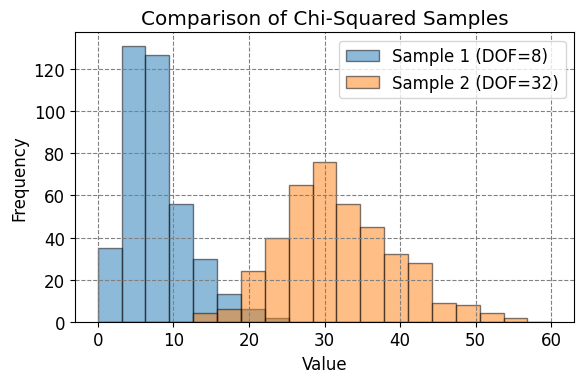

In [59]:
np.random.seed(2020)                   # Set random seed

sample1 = np.random.chisquare(8, 400)  # Sample 1: Chi-squared with 8 DOF, size 400
sample2 = np.random.chisquare(32, 400) # Sample 2: Chi-squared with 32 DOF, size 400

plt.figure(figsize=(6, 4))             # Set up the figure size

# Plot the histogram for sample1
plt.hist(sample1, 
         bins=np.linspace(0, 60, 20),  # Define bins between 0 and 60 with 20 intervals
         edgecolor='black',            # Add black edges to the bars
         alpha=0.5,                    # Set transparency to 50%
         label="Sample 1 (DOF=8)")     # Add label for the legend

# Plot the histogram for sample2
plt.hist(sample2, 
         bins=np.linspace(0, 60, 20),  # Use the same bins for comparison
         edgecolor='black',            # Add black edges to the bars
         alpha=0.5,                    # Set transparency to 50%
         label="Sample 2 (DOF=32)")    # Add label for the legend

plt.legend()                                            # Add a legend to distinguish the two samples
plt.xlabel("Value")                                     # Label for the x-axis
plt.ylabel("Frequency")                                 # Label for the y-axis
plt.title("Comparison of Chi-Squared Samples")          # Add a title for the histogram
plt.grid(visible=True, linestyle="--", color="grey")    # Add gridlines with dashed style

plt.tight_layout()                                      # Adjust layout to avoid overlaps
plt.show()                                              # Display the histogram

### Test the Normality

In [61]:
from scipy.stats import shapiro, anderson

# Perform the Shapiro-Wilk and Anderson-Darling Tests
shapiro_sample1 = shapiro(sample1)
shapiro_sample2 = shapiro(sample2)
anderson_sample1 = anderson(sample1)
anderson_sample2 = anderson(sample2)

# Print Results for Shapiro-Wilk Test
print("======== Results for Shapiro-Wilk Test ========\n")
print(f"Sample 1: Statistic = {shapiro_sample1.statistic:.4f}, P-value = {shapiro_sample1.pvalue:.4e}")
print(f"Sample 2: Statistic = {shapiro_sample2.statistic:.4f}, P-value = {shapiro_sample2.pvalue:.4e}\n")

# Print Results for Anderson-Darling Test
print("======== Results for Anderson-Darling Test ========")
print("\nSample 1:")
print(f"  Statistic         = {anderson_sample1.statistic:.4f}")
print(f"  Critical Values   = {anderson_sample1.critical_values}")
print(f"  Significance Lvls = {anderson_sample1.significance_level}")
print(f"  Fit Parameters    = Location = {anderson_sample1.fit_result.params.loc:.4f}, Scale = {anderson_sample1.fit_result.params.scale:.4f}\n")

print("Sample 2:")
print(f"  Statistic         = {anderson_sample2.statistic:.4f}")
print(f"  Critical Values   = {anderson_sample2.critical_values}")
print(f"  Significance Lvls = {anderson_sample2.significance_level}")
print(f"  Fit Parameters    = Location = {anderson_sample2.fit_result.params.loc:.4f}, Scale = {anderson_sample2.fit_result.params.scale:.4f}")

======== Results for Shapiro-Wilk Test ========

Sample 1: Statistic = 0.9362, P-value = 4.5376e-12
Sample 2: Statistic = 0.9821, P-value = 7.2457e-05

======== Results for Anderson-Darling Test ========

Sample 1:
  Statistic         = 6.0078
  Critical Values   = [0.57  0.65  0.779 0.909 1.081]
  Significance Lvls = [15.  10.   5.   2.5  1. ]
  Fit Parameters    = Location = 7.8451, Scale = 4.1650

Sample 2:
  Statistic         = 1.8332
  Critical Values   = [0.57  0.65  0.779 0.909 1.081]
  Significance Lvls = [15.  10.   5.   2.5  1. ]
  Fit Parameters    = Location = 31.9326, Scale = 7.7355


### Conclusions:
#### 1. Shapiro-Wilk Test Results:

Purpose: The Shapiro-Wilk test checks for normality in the data. A small p-value (typically ≤ 0.05) indicates the data significantly deviates from a normal distribution.

Sample 1:

    Statistic: 0.9362
    P-value: 4.5376 × 10^−12 (very small)
    Conclusion: The p-value is extremely small, indicating Sample 1 is not normally distributed.

Sample 2:

    Statistic: 0.9821
    P-value: 7.2457×10 ^−5 (small)
    Conclusion: The p-value is also very small, though not as extreme as Sample 1. This indicates Sample 2 is not normally distributed.

#### 2. Anderson-Darling Test Results:

Purpose: The Anderson-Darling test also checks for normality but provides more critical values at various significance levels (15%, 10%, 5%, 2.5%, and 1%). A test statistic larger than a critical value indicates non-normality at that significance level.

Sample 1:

    Statistic: 6.0078
    Critical Values: [0.57, 0.65, 0.779, 0.909, 1.081]
    Conclusion: The test statistic (6.0078) greatly exceeds all critical values, even at the 1% significance level. This confirms Sample 1 strongly deviates from normality.

Sample 2:

    Statistic: 1.8332
    Critical Values: [0.57, 0.65, 0.779, 0.909, 1.081]
    Conclusion: The test statistic (1.8332) exceeds all critical values, including the 1% significance level. This confirms Sample 2 also deviates from normality, though the deviation is less extreme compared to Sample 1.

#### 3. Fit Parameters (Location and Scale):

Sample 1:

    Location = 7.8451, Scale = 4.1650
    The data has a mean around 7.85 with a moderate spread.

Sample 2:

    Location = 31.9326, Scale = 7.7355
    The data has a higher mean (31.93) and a larger spread compared to Sample 1.

#### Overall Summary:

Both Sample 1 and Sample 2 fail the normality tests (Shapiro-Wilk and Anderson-Darling), with Sample 1 showing a much stronger deviation. Therefore, these datasets are not normally distributed, and further analysis requiring normality assumptions (e.g., t-tests) should be reconsidered or appropriate non-parametric alternatives should be used.

In [63]:
sample3 = np.random.normal(0,1,400)

# Perform the Shapiro-Wilk and Anderson-Darling Tests
shapiro_sample3 = shapiro(sample3)
anderson_sample3 = anderson(sample3)

# Print Results for Shapiro-Wilk Test
print("======== Results for Shapiro-Wilk Test ========\n")
print(f"Sample 3: Statistic = {shapiro_sample3.statistic:.4f}, P-value = {shapiro_sample3.pvalue:.4e}\n")

# Print Results for Anderson-Darling Test
print("======== Results for Anderson-Darling Test ========")
print("\nSample 3:")
print(f"  Statistic         = {anderson_sample3.statistic:.4f}")
print(f"  Critical Values   = {anderson_sample3.critical_values}")
print(f"  Significance Lvls = {anderson_sample3.significance_level}")
print(f"  Fit Parameters    = Location = {anderson_sample3.fit_result.params.loc:.4f}, Scale = {anderson_sample3.fit_result.params.scale:.4f}\n")


======== Results for Shapiro-Wilk Test ========

Sample 3: Statistic = 0.9981, P-value = 9.3454e-01

======== Results for Anderson-Darling Test ========

Sample 3:
  Statistic         = 0.1809
  Critical Values   = [0.57  0.65  0.779 0.909 1.081]
  Significance Lvls = [15.  10.   5.   2.5  1. ]
  Fit Parameters    = Location = -0.0028, Scale = 0.9462



#### Conclusion:

Shapiro-Wilk Test:

    P-value = 0.2821 → Greater than 0.05.
    Conclusion: Sample 3 does not significantly deviate from normality.

Anderson-Darling Test:

    Statistic = 0.4681 → Below all critical values.
    Conclusion: Sample 3 passes the normality test at all significance levels.

Overall: Sample 3 appears to be normally distributed.

## Example 3, Goodness of Fit Test

Suppose you go to a casino and encounter a new game. The new game involves drawing
cards from a deck of cards three times (the deck doesn't contain jokers). You will win the
game if two or three of the cards drawn belong to the suit of hearts; otherwise, you lose
your bet. You are a cautious gambler, so you sit there, watch, and count. After a whole day
of walking around the casino and memorizing, you observe the following results of card
draws. There are four cases in total. I've tabulated the outcomes here:

| Number of Hearts | Number of Observations |
|----------|----------|
| 0  | 460   |
| 1   | 451   |
| 2   | 102   |
| 3   | 10   |
| All cases   | 1023   |

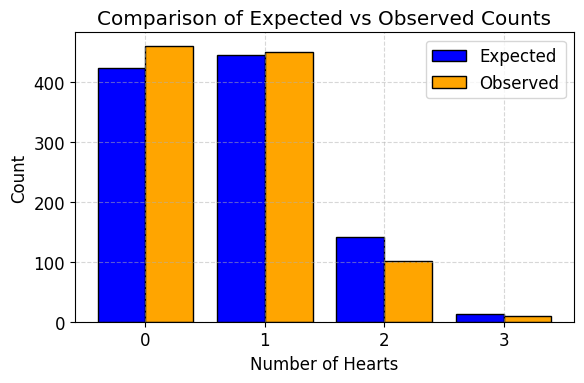

In [68]:
from scipy.special import comb

# Calculate probabilities for different numbers of hearts (0 to 3) in a hand of 3 cards
P = [comb(39, 3-i) * comb(13, i) / comb(52, 3) for i in range(4)]  # Hypergeometric probabilities

# Expected counts based on probabilities (assuming 1023 total trials)
expected = [1023 * p for p in P]  # Scale probabilities to expected counts

# Observed counts from the experiment
observed = [460, 451, 102, 10]  # Observed values for 0, 1, 2, and 3 hearts

# x-axis positions for each category (0 to 3 hearts)
x = np.array([0, 1, 2, 3])

plt.figure(figsize=(6, 4))                       # Set figure size to 10x6 inches

# Plot the expected counts as bars slightly shifted left
plt.bar(x - 0.2, expected, width=0.4, label="Expected", color='blue', edgecolor='black')

# Plot the observed counts as bars slightly shifted right
plt.bar(x + 0.2, observed, width=0.4, label="Observed", color='orange', edgecolor='black')

plt.legend()                                      # Add legend to distinguish between expected and observed
plt.xticks(ticks=[0, 1, 2, 3])                    # Set x-axis ticks to represent number of hearts
plt.xlabel("Number of Hearts")                    # Label for x-axis
plt.ylabel("Count")                               # Label for y-axis
plt.title("Comparison of Expected vs Observed Counts")  # Add a title for clarity

plt.grid(visible=True, linestyle="--", alpha=0.5) # Add a dashed grid for better readability

plt.tight_layout()                                # Adjust layout to avoid overlapping
plt.show()                                        # Display the bar plot

*The expected number of hearts and the observed number of hearts.*

### Do the test

In [71]:
from scipy.stats import chisquare

chisquare(observed,expected)

Power_divergenceResult(statistic=14.777716323788255, pvalue=0.002016803916729754)

#### Interpretation:
1. The null hypothesis assumes that the observed counts match the expected counts.
2. Given the p-value (0.0020), which is much smaller than a typical significance level (e.g., 0.05), we reject the null hypothesis.
3. This indicates that there is a significant difference between the observed and expected counts, suggesting that the distribution of the number of hearts in the sample does not align with the expected theoretical distribution.

**The game can not be fair!**

The following PDF of the x2 distribution with a DOF of 3 can give us a visual idea of how unfair the game is:

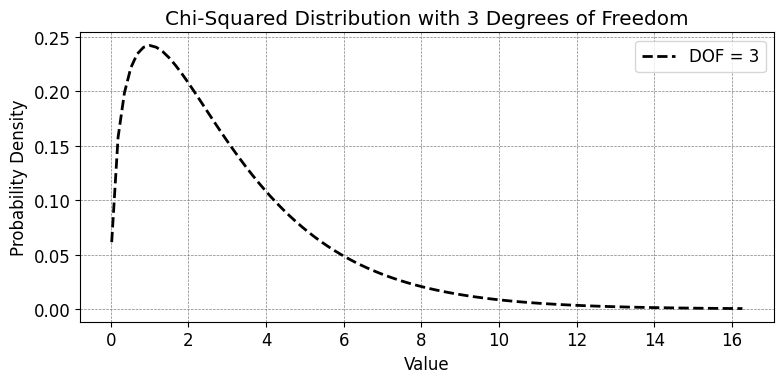

In [74]:
plt.figure(figsize=(8, 4))           # Set the figure size to 10x6 inches

# Generate the x-values (range of chi-squared distribution) between 0.1% and 99.9% percentiles for 3 DOF
x = np.linspace(chi2.ppf(0.001, 3),  # Lower bound: 0.1% percentile of chi-squared with 3 DOF
                chi2.ppf(0.999, 3),  # Upper bound: 99.9% percentile of chi-squared with 3 DOF
                100)                 # Generate 100 equally spaced points

rv = chi2(3)  # Create a chi-squared distribution object with 3 degrees of freedom (DOF)

# Plot the Probability Density Function (PDF) of the chi-squared distribution
plt.plot(x, rv.pdf(x),               # x-values and corresponding PDF values
         color='black',              # Plot as a solid black line ('k' means black)
         lw=2,                       # Line width set to 4 for better visibility
         linestyle="--",             # Use a dashed line style
         label="DOF = 3")            # Add a label for the legend

plt.title("Chi-Squared Distribution with 3 Degrees of Freedom")      # Add a title to the plot
plt.xlabel("Value")                                                  # Label for the x-axis
plt.ylabel("Probability Density")                                    # Label for the y-axis
plt.legend(loc="upper right")                                        # Display the legend at the upper right
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey")  # Add horizontal grid lines for clarity

plt.tight_layout()                   # Adjust the layout to avoid overlaps
plt.show()                           # Display the plot

# A simple ANOVA model

#### ANOVA has three assumptions: 

    The first assumption is that the data from each group must be distributed normally. 
    The second assumption is that samples from each group must have the same variance. 
    The third assumption is that each sample should be randomly selected. 

In our example, I assume that these three conditions are met. However, the imbalance of income does violate normality in real life. Just to let you know.

In [77]:
# Define salary data for four cities: San Francisco, Los Angeles, Boston, and New York
SF = np.array([120000, 110300, 127800, 68900, 79040, 208000, 159000, 89000])  # SF salaries
LA = np.array([65700, 88340, 240000, 190000, 45080, 25900, 69000, 120300])    # LA salaries
BO = np.array([87999, 86340, 98000, 124000, 113800, 98000, 108000, 78080])    # Boston salaries
NY = np.array([300000, 62010, 45000, 130000, 238000, 56000, 89000, 123000])   # NY salaries

# Combine all salary data into a single array to calculate the overall mean
mu = np.mean(np.concatenate((SF, LA, BO, NY)))                                # Overall mean salary

# Calculate Total Sum of Squares (ST): sum of squared differences from the overall mean
ST = np.sum((np.concatenate((SF, LA, BO, NY)) - mu) ** 2)                     # Total variability in the data

# Calculate Within-Group Sum of Squares (SW): sum of squared deviations within each group
SW = (np.sum((SF - np.mean(SF)) ** 2) +                                       # Variability within SF
      np.sum((LA - np.mean(LA)) ** 2) +                                       # Variability within LA
      np.sum((BO - np.mean(BO)) ** 2) +                                       # Variability within BO
      np.sum((NY - np.mean(NY)) ** 2))                                        # Variability within NY

# Calculate Between-Group Sum of Squares (SB): variability explained by group means
SB = (8 * (np.mean(SF) - mu) ** 2 +                                           # Variability between SF mean and overall mean
      8 * (np.mean(LA) - mu) ** 2 +                                           # Variability between LA mean and overall mean
      8 * (np.mean(BO) - mu) ** 2 +                                           # Variability between BO mean and overall mean
      8 * (np.mean(NY) - mu) ** 2)                                            # Variability between NY mean and overall mean

# Check if Total Sum of Squares equals the sum of Between-Group and Within-Group sums
ST == SW + SB                             # True if equality holds: Total Variance = Explained Variance + Residual Variance

True

In [78]:
# Print Total Sum of Squares (ST), Within-Group Sum of Squares (SW), and Between-Group Sum of Squares (SB)
print(f"        Total Sum of Squares (ST): {ST:.2f}")            # Display ST rounded to 2 decimals
print(f" Within-Group Sum of Squares (SW): {SW:.2f}")     # Display SW rounded to 2 decimals
print(f"Between-Group Sum of Squares (SB):   {SB:.2f}")    # Display SB rounded to 2 decimals

        Total Sum of Squares (ST): 119342699672.22
 Within-Group Sum of Squares (SW): 114578236693.38
Between-Group Sum of Squares (SB):   4764462978.84


In [79]:
F = SB/(4-1)/(SW/(4*8-4))       # Calculate F-Statistic

print(f'F-Statistic: {F:.3f}')  # Print F-Statistic

F-Statistic: 0.388


Let's also at the PDF of the F-distribution.

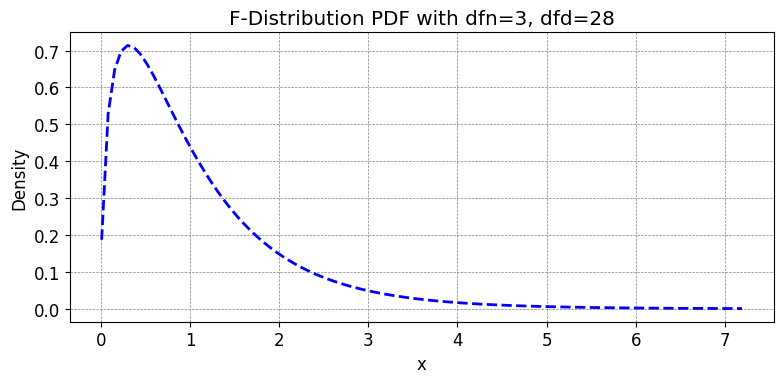

In [81]:
plt.figure(figsize=(8, 4))                         # Set figure size

# Generate x-values from the F-distribution percent point function (ppf)
x = np.linspace(f.ppf(0.001, 3, 28),               # Start at the 0.1% percentile of F(3,28)
                f.ppf(0.999, 3, 28), 100)          # End at the 99.9% percentile of F(3,28), with 100 points

# Create an F-distribution object with 3 and 28 degrees of freedom
rv = f(dfn=3, dfd=28)

# Plot the Probability Density Function (PDF) of the F-distribution
plt.plot(x, rv.pdf(x),                             # Corresponding PDF values (Y-axis)
         color='blue',                             # Set line color to blue
         lw=2,                                     # Set line width to 2
         linestyle="--")                           # Use a dashed line style for clarity

plt.title("F-Distribution PDF with dfn=3, dfd=28") # Add a title
plt.xlabel("x")                                    # Label x-axis
plt.ylabel("Density")                              # Label y-axis
plt.grid(visible=True, linestyle="--", linewidth=0.5, color="grey") # Add a grid for better readability

plt.tight_layout()                                 # Adjust layout to prevent overlaps
plt.show()                                         # Display the plot

In [82]:
from scipy.stats import f_oneway

f_oneway(LA,NY,SF,BO)

F_onewayResult(statistic=0.38810442907126874, pvalue=0.7624301696455358)

In [83]:
# Perform F-test
f_stat, p_value=  f_oneway(LA,NY,SF,BO)

# Print the results
print(f"F-Statistic: {f_stat:.4f}")        
print(f"    P-Value: {p_value:.4f}")

F-Statistic: 0.3881
    P-Value: 0.7624


The P-value suggests that we can't reject the null hypothesis even at a very high significance value (everything is due to randomness).

# Stationarity Tests for Time Series

### White Noise

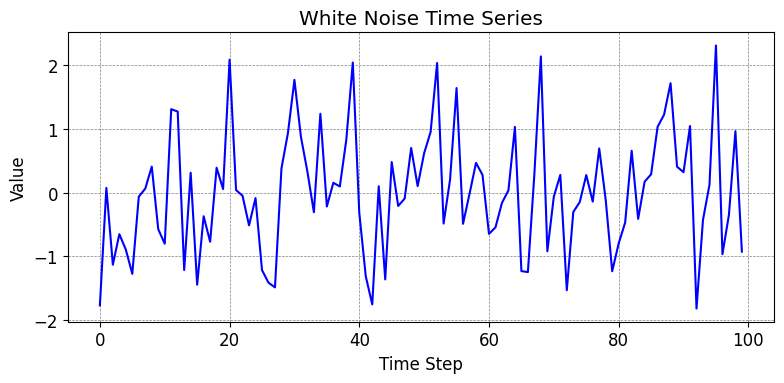

In [87]:
# White Noise

np.random.seed(2020)                            # Set seed for reproducibility

plt.figure(figsize=(8, 4))                      # Set figure size to 10x6 inches

# Generate white noise: 100 random values from a standard normal distribution
white_noise = [np.random.normal() for _ in range(100)]

plt.plot(white_noise,                           # Plot the white noise values
         color="blue",                          # Set line color to blue
         linestyle="-",                         # Use a solid line style
         linewidth=1.5)                         # Set line width for better visibility

plt.xlabel("Time Step")                         # Label x-axis to represent time steps
plt.ylabel("Value")                             # Label y-axis to represent values
plt.title("White Noise Time Series")            # Add a descriptive title

plt.grid(visible=True, linestyle="--",          # Add grid with dashed lines
         linewidth=0.5, color="grey")

plt.tight_layout()                              # Adjust layout to prevent overlap
plt.show()                                      # Display the plot

### Random walk and modified random walk

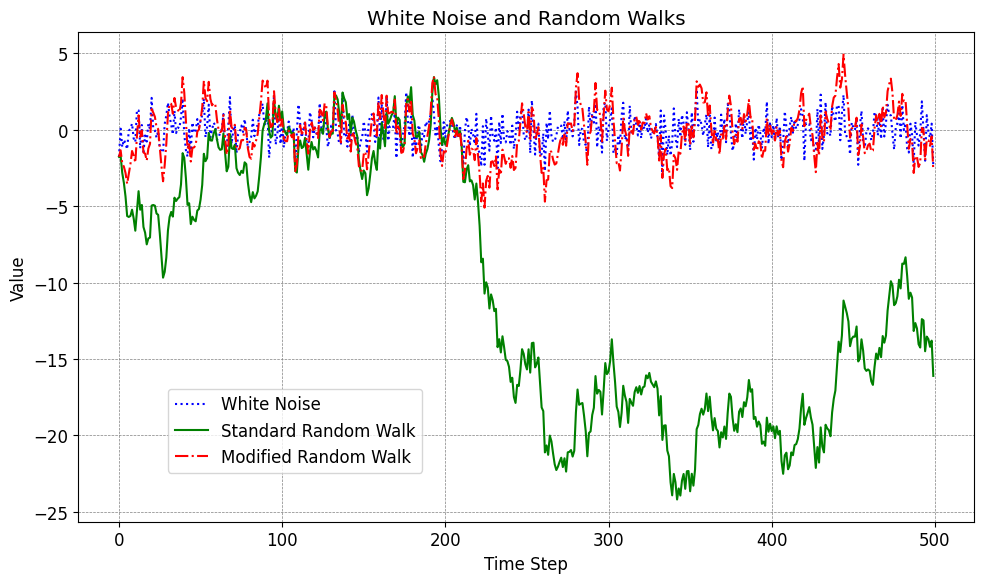

In [89]:
plt.figure(figsize=(10, 6))                   # Set figure size to 10x6 inches

np.random.seed(2020)                          # Set seed for reproducibility

# Generate 500 white noise values from a standard normal distribution
white_noise = [np.random.normal() for _ in range(500)]

# Initialize a modified random walk and append the first white noise value
random_walk_modified = [white_noise[0]]
for i in range(1, 500):                       # Loop to generate modified random walk
    
    # Update the next step based on the previous value (damped by 0.8) + new white noise
    random_walk_modified.append(random_walk_modified[-1] * 0.8 + white_noise[i])

# Create a standard random walk by cumulatively summing the white noise values
random_walk = np.cumsum(white_noise)

# Plot white noise as a dotted line
plt.plot(white_noise, 
         label="White Noise",                # Label for legend
         linestyle=":",                      # Use dotted line style
         color="blue")                       # Use blue color

# Plot standard random walk as a solid line
plt.plot(random_walk, 
         label="Standard Random Walk",       # Label for legend
         linestyle="-",                      # Use solid line style
         color="green")                      # Use green color

# Plot modified random walk as a dash-dot line
plt.plot(random_walk_modified, 
         label="Modified Random Walk",       # Label for legend
         linestyle="-.",                     # Use dash-dot line style
         color="red")                        # Use red color

plt.xlabel("Time Step")                      # Label for x-axis
plt.ylabel("Value")                          # Label for y-axis
plt.title("White Noise and Random Walks")    # Title for the plot
plt.legend(loc=[0.1, 0.1])                   # Add legend at the bottom left corner

plt.grid(visible=True, linestyle="--",       # Add grid with dashed lines
         linewidth=0.5, color="grey")

plt.tight_layout()                           # Adjust layout to prevent overlap
plt.show()                                   # Display the plot

*A comparison of a modified random walk and a standard random walk.*

### Another 2nd order auto-regressive model

The characteristic equation reads 𝑓(𝑠) = 1– 0.6𝑠 + 1.2𝑠^2. It has two roots. Both roots
are complex numbers with non-zero imaginary parts. The roots' absolute values are also
smaller than 1 on the complex plane. The following code snippet plots the two roots
on the complex plane. You can see that they are just inside the unit circle, as shown bellow:

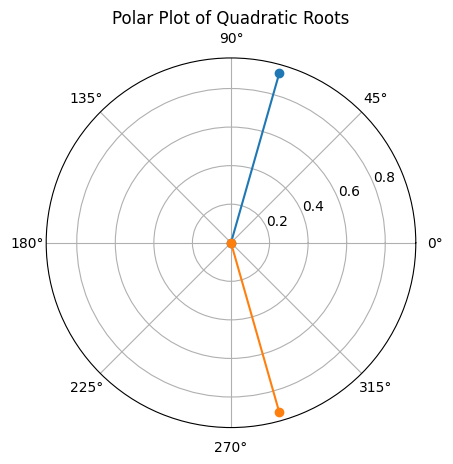

In [93]:
plt.rcParams.update({'font.size': 10})                  # Set font size to 10 for smaller text

# Loop through the roots of the quadratic equation with coefficients [1.2, -0.6, 1]
for root in np.roots([1.2, -0.6, 1]):                  
    plt.polar(                                          # Create a polar plot for each root
        [0, np.angle(root)],                            # Angle of the root (direction)
        [0, abs(root)],                                 # Magnitude of the root (distance from origin)
        marker='o',                                     # Use a circle marker at the root location
        linestyle='-'                                   # Solid line from origin to the root
    )

plt.title("Polar Plot of Quadratic Roots")              # Add a title to the polar plot
plt.rcParams.update({'font.size': 12})                  # Reset font size to 12 for further plots

plt.show()                                              # Display the polar plot

### Oscillating Behavior

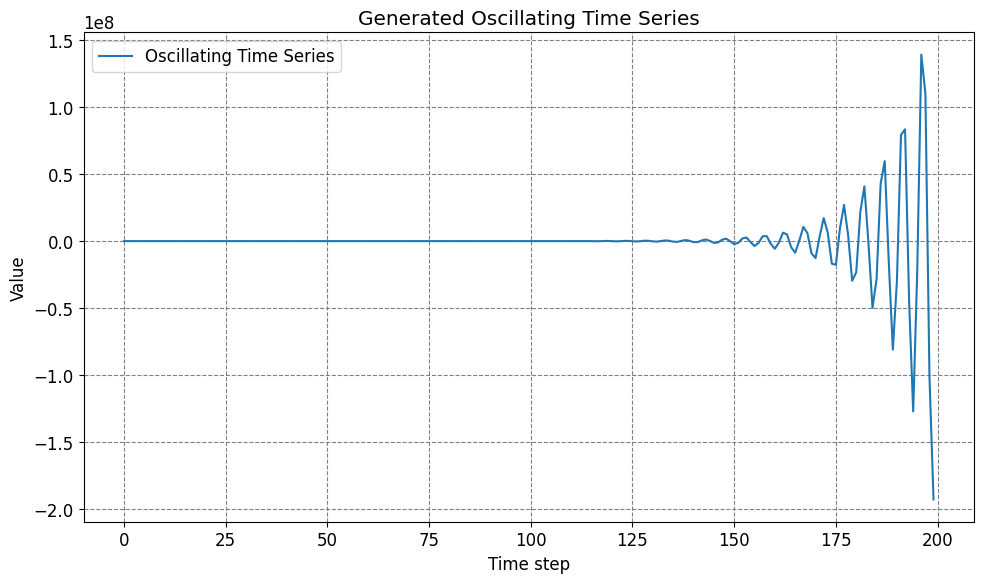

In [95]:
plt.figure(figsize=(10, 6))                             # Set figure size to 10x6 inches

np.random.seed(2020)                                    # Set random seed for reproducibility

# Generate white noise sequence of 200 random values
white_noise = [np.random.normal() for _ in range(200)]  

# Initialize the series with the first two values of white noise
series = [white_noise[0], white_noise[1]]              

# Generate the oscillating time series using a recursive formula
for i in range(2, 200):                                
    series.append(series[i-1] * 0.6                    # Add a weighted contribution from the previous value
                  - series[i-2] * 1.2                  # Subtract a weighted contribution from two steps before
                  + white_noise[i])                    # Add current white noise term

# Plot the oscillating series
plt.plot(series, label="Oscillating Time Series")       # Plot the generated series with a label
plt.xlabel("Time step")                                 # Label for the x-axis
plt.ylabel("Value")                                     # Label for the y-axis

plt.legend()                                            # Display the legend for clarity

plt.title("Generated Oscillating Time Series")          # Add a title for the plot
plt.grid(visible=True, linestyle="--", color="grey")    # Add a horizontal grid for readability

plt.tight_layout()                                      # Adjust layout to prevent overlaps
plt.show()                                              # Display the plot


## ADF test

In [97]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test on white noise
adf_result = adfuller(white_noise)

# Unpack ADF test results
adf_statistic, p_value, lags_used, nobs, critical_values, ic_best = adf_result

# Print the results in a readable format
print("\n===== Augmented Dickey-Fuller Test Results =====\n")
print(f"ADF Statistic:         {adf_statistic:.4f}")
print(f"P-Value:               {p_value:.4e}")
print(f"Number of Lags Used:   {lags_used}")
print(f"Number of Observations:{nobs}")

print("\nCritical Values:")
for key, value in critical_values.items():
    print(f"    {key} level:      {value:.4f}")
    
print(f"\nBest Information Criterion (AIC): {ic_best:.4f}")


===== Augmented Dickey-Fuller Test Results =====

ADF Statistic:         -13.4565
P-Value:               3.5984e-25
Number of Lags Used:   0
Number of Observations:199

Critical Values:
    1% level:      -3.4636
    5% level:      -2.8762
    10% level:      -2.5746

Best Information Criterion (AIC): 516.1905


#### Conclusion:

The Augmented Dickey-Fuller (ADF) test indicates that the series is **stationary**:

    The ADF statistic (-13.4565) is much smaller than all critical values at the 1%, 5%, and 10% levels.
    The p-value (3.5984e-25) is extremely low, well below any standard significance threshold (e.g., 0.05).

Thus, we reject the null hypothesis that the series has a unit root, confirming that the series does not exhibit a trend or drift and is stationary.

In [99]:
# Perform Augmented Dickey-Fuller Test on random_walk
adf_result = adfuller(random_walk)

# Unpack ADF test results
adf_statistic, p_value, lags_used, nobs, critical_values, ic_best = adf_result

# Print the results in a readable format
print("\n===== Augmented Dickey-Fuller Test Results =====\n")
print(f"ADF Statistic:         {adf_statistic:.4f}")
print(f"P-Value:               {p_value:.4e}")
print(f"Number of Lags Used:   {lags_used}")
print(f"Number of Observations:{nobs}")

print("\nCritical Values:")
for key, value in critical_values.items():
    print(f"    {key} level:      {value:.4f}")
    
print(f"\nBest Information Criterion (AIC): {ic_best:.4f}")


===== Augmented Dickey-Fuller Test Results =====

ADF Statistic:         -1.4609
P-Value:               5.5273e-01
Number of Lags Used:   0
Number of Observations:499

Critical Values:
    1% level:      -3.4435
    5% level:      -2.8673
    10% level:      -2.5699

Best Information Criterion (AIC): 1374.4481


#### Conclusion:
The Augmented Dickey-Fuller (ADF) test indicates that the series is **non-stationary**:

    The ADF statistic (-1.4609) is greater than all critical values at the 1%, 5%, and 10% levels.
    The p-value (0.5527) is significantly higher than any standard significance threshold (e.g., 0.05).

Thus, we fail to reject the null hypothesis that the series has a unit root, confirming that the series is non-stationary.

In [101]:
# Perform Augmented Dickey-Fuller Test on random_walk_modified
adf_result = adfuller(random_walk_modified)

# Unpack ADF test results
adf_statistic, p_value, lags_used, nobs, critical_values, ic_best = adf_result

# Print the results in a readable format
print("\n===== Augmented Dickey-Fuller Test Results =====\n")
print(f"ADF Statistic:         {adf_statistic:.4f}")
print(f"P-Value:               {p_value:.4e}")
print(f"Number of Lags Used:   {lags_used}")
print(f"Number of Observations:{nobs}")

print("\nCritical Values:")
for key, value in critical_values.items():
    print(f"    {key} level:      {value:.4f}")
    
print(f"\nBest Information Criterion (AIC): {ic_best:.4f}")


===== Augmented Dickey-Fuller Test Results =====

ADF Statistic:         -7.7001
P-Value:               1.3463e-11
Number of Lags Used:   0
Number of Observations:499

Critical Values:
    1% level:      -3.4435
    5% level:      -2.8673
    10% level:      -2.5699

Best Information Criterion (AIC): 1375.6034


#### Conclusion:
The Augmented Dickey-Fuller (ADF) test indicates that the series is **stationary**:

    The ADF statistic (-7.7001) is less than the critical values at the 1%, 5%, and 10% levels.
    The p-value (1.3463e-11) is significantly lower than the standard significance threshold (e.g., 0.05).

Thus, we reject the null hypothesis that the series has a unit root, confirming that the series is stationary.

In [103]:
# Perform Augmented Dickey-Fuller Test on series
adf_result = adfuller(series)

# Unpack ADF test results
adf_statistic, p_value, lags_used, nobs, critical_values, ic_best = adf_result

# Print the results in a readable format
print("\n===== Augmented Dickey-Fuller Test Results =====\n")
print(f"ADF Statistic:         {adf_statistic:.4f}")
print(f"P-Value:               {p_value:.4e}")
print(f"Number of Lags Used:   {lags_used}")
print(f"Number of Observations:{nobs}")

print("\nCritical Values:")
for key, value in critical_values.items():
    print(f"    {key} level:      {value:.4f}")
    
print(f"\nBest Information Criterion (AIC): {ic_best:.4f}")


===== Augmented Dickey-Fuller Test Results =====

ADF Statistic:         -379317593.2428
P-Value:               0.0000e+00
Number of Lags Used:   1
Number of Observations:198

Critical Values:
    1% level:      -3.4638
    5% level:      -2.8763
    10% level:      -2.5746

Best Information Criterion (AIC): 518.0917


#### Conclusion:
The Augmented Dickey-Fuller (ADF) test confirms that the series is **stationary**:

    The ADF statistic (-379317593.2428) is much smaller than the critical values at the 1%, 5%, and 10% levels.
    The p-value (0.0000) is extremely low (essentially zero), far below any standard significance level (e.g., 0.05).

Therefore, we reject the null hypothesis of a unit root, indicating that the series is stationary.

# A/B Testing

First, let's assume that 60% of the users use mobile, 90% of them use
Chrome, and 80% of them visit the website using a strong WiFi signal. We also assume
that there are no interactions among those variables; for instance, we do not assume that
Chrome users have a strong preference to stick to a strong WiFi connection.

In [107]:
random.seed(2020)                                                 # Set random seed for reproducibility

def build_sample():                                               # Function to build a sample with conditional probabilities
    
    device = "mobile" if np.random.random() < 0.6 else "desktop"  # Randomly assign 'device' based on probability (60% mobile, 40% desktop)
    browser = "chrome" if np.random.random() < 0.9 else "IE"      # Randomly assign 'browser' based on probability (90% chrome, 10% IE)
    wifi = "strong" if np.random.random() < 0.8 else "weak"       # Randomly assign 'wifi' based on probability (80% strong, 20% weak)   
    scheme = "warm" if np.random.random() < 0.5 else "cold"       # Randomly assign 'scheme' based on probability (50% warm, 50% cold)
    
    return (device, browser, wifi, scheme)                        # Return the sample as a tuple of attributes

Let's first generate 100 sample points and sort the results by the number of appearances:

In [109]:
from collections import Counter  

# Generate 100 samples using the 'build_sample' function
results = [build_sample() for _ in range(100)]

# Count the frequency of each unique sample in 'results'
counter = Counter(results)

# Loop through the sorted results based on the count of each sample
for key in sorted(counter, key=lambda x: counter[x]):  # Sort keys by their frequency in ascending order
    print(key, counter[key])                           # Print each unique sample and its count

('desktop', 'IE', 'strong', 'cold') 1
('desktop', 'IE', 'strong', 'warm') 2
('mobile', 'IE', 'strong', 'warm') 2
('desktop', 'chrome', 'weak', 'cold') 4
('mobile', 'IE', 'strong', 'cold') 4
('mobile', 'chrome', 'weak', 'warm') 4
('desktop', 'chrome', 'weak', 'warm') 4
('mobile', 'chrome', 'weak', 'cold') 5
('desktop', 'chrome', 'strong', 'cold') 9
('desktop', 'chrome', 'strong', 'warm') 19
('mobile', 'chrome', 'strong', 'cold') 20
('mobile', 'chrome', 'strong', 'warm') 26


Example: For the combination ('mobile', 'chrome', 'weak', 'cold') there are 5 samples.

If you check each pair with the same setting, for example, users who use the mobileChrome browser with strong WiFi signal, have a roughly 50-50% chance of getting thecold or warm color scheme landing page.

Let's try another 10,000 samples. The only change in the code snippet is changing 100 to
10000. The result looks like this:

In [112]:
# Generate 10,000 samples using the 'build_sample' function
results = [build_sample() for _ in range(10000)]

# Count the frequency of each unique sample in 'results'
counter = Counter(results)

# Loop through the sorted results based on the count of each sample
for key in sorted(counter, key=lambda x: counter[x]):  # Sort keys by their frequency in ascending order
    print(key, counter[key])                           # Print each unique sample and its count

('desktop', 'IE', 'weak', 'cold') 30
('desktop', 'IE', 'weak', 'warm') 42
('mobile', 'IE', 'weak', 'cold') 64
('mobile', 'IE', 'weak', 'warm') 68
('desktop', 'IE', 'strong', 'cold') 162
('desktop', 'IE', 'strong', 'warm') 164
('mobile', 'IE', 'strong', 'cold') 233
('mobile', 'IE', 'strong', 'warm') 238
('desktop', 'chrome', 'weak', 'cold') 340
('desktop', 'chrome', 'weak', 'warm') 365
('mobile', 'chrome', 'weak', 'warm') 514
('mobile', 'chrome', 'weak', 'cold') 531
('desktop', 'chrome', 'strong', 'warm') 1401
('desktop', 'chrome', 'strong', 'cold') 1432
('mobile', 'chrome', 'strong', 'warm') 2190
('mobile', 'chrome', 'strong', 'cold') 2226
